## Using solve_ivp
In this section we will learn how to use solve_ivp, from the scipy integration package.

This will be important for the assignment

In [1]:
import scipy.integrate
import numpy as np
from matplotlib import pyplot as plt

$$\frac{dy}{dt} = 2t$$

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6014
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.0000e+00, 1.0000e-04, 1.1000e-03, ..., 9.9811e+00, 9.9911e+00,
       1.0000e+01])
 t_events: None
        y: array([[  1.        ,   1.00000001,   1.00000121, ..., 100.62235721,
        100.82207921, 101.        ]])
 y_events: None


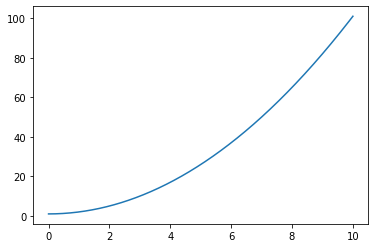

In [30]:
# defining the function
def fun(t, y):
    return 2*t

# Doing the integral
# scipy.integrate.solve_ivp(function, time span [t_0, t_final], [y0])
sol = scipy.integrate.solve_ivp(fun, [0,10], [1],max_step=0.01)

# Because solve_ivp automatically make the timebase, we can force it to the stepsize we want with max_step

print(sol)

# Plotting it
plt.plot(sol.t, sol.y[0])

# Double integrals: A falling ball
Lets try using ODE int to get the trajectory of a falling ball

$$ \ddot{x} = a $$

Split the second derivatives into two first derivatives

$$\frac{dx}{dt} = \dot{x} \qquad \frac{d\dot{x}}{dt} = a $$

Rename the dots for coding clarity

$$\frac{dx}{dt} = v \qquad \frac{dv}{dt} = a $$

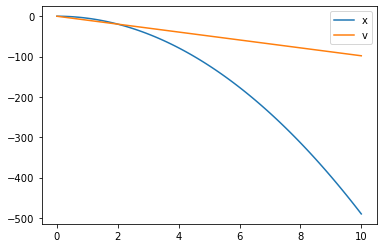

In [37]:
# defining the function
def fun(t, y, g):
    x,v = y # split the vector y into its two values
    
    dxdt = v
    dvdt = g 
    
    return dxdt, dvdt # return a tuple of our derivatives

# doing the integral and giving g=-9.8 as an argument
sol = scipy.integrate.solve_ivp(fun,[0,10],[0,0],args=(-9.8,),max_step=0.1)  
# note that args wil only takes a tuple

#print(sol)

# Plotting it
plt.plot(sol.t, sol.y[0], label="x")
plt.plot(sol.t, sol.y[1], label="v")
plt.legend()

# Spring

Lets do the same thing with the equation of motion for a spring

$$ \ddot{x} +\omega^2 x = 0 $$

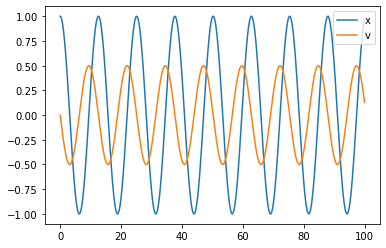

In [43]:
# defining the function
def osc(t, y, w):
    x,v = y # split the tuple y into its two values
    
    dxdt = v
    dvdt = -w**2 *x
    
    return dxdt, dvdt # return a tuple of our derivatives

# Doing the integral
sol = scipy.integrate.solve_ivp(osc, [0,100], [1,0], args=(0.5,), max_step=0.1 )

# Plotting it
plt.plot(sol.t, sol.y[0], label="x")
plt.plot(sol.t, sol.y[1], label="v")
plt.legend()

**Homework / Tute Work**

1) Have a look at the [course notes](https://github.com/phys3112/intro/blob/master/mcba2-numerical-integration-of-ODEs.ipynb) or the [solve_ivp notes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) to get a better idea of how the ODE function works.

2) Find another set of differential equations and run them through ODE int. This is good practice for the assignment. One starting point is [wikipedia](https://en.wikipedia.org/wiki/List_of_named_differential_equations)

Here are a few examples in increasing difficulty:
* Radioactive decay (use 5 kg of uranium-235)
* Predator–prey equations (see if you can get an interesting phase diagram)